# Results Analysis

This notebook is intended to read a simulation results file and report the analysis.

In [1]:
%load_ext memory_profiler
%matplotlib inline

import os
import sys 
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import graph_tool.all as gt
import matplotlib.pyplot as plt

# Modify the Notebook path
sys.path.append(os.path.join(os.getcwd(), ".."))

from cloudscope.colors import ColorMap
from cloudscope.results import Results
from cloudscope.viz import draw_topology
from cloudscope.viz import plot_workload
from cloudscope.viz import plot_message_traffic

from cloudscope.results.graph import extract_graph
from cloudscope.results.analysis import create_per_replica_dataframe as create_dataframe
from cloudscope.results.analysis import create_messages_dataframe

In [2]:
sns.set_style('whitegrid')
sns.set_context('notebook')
sns.set_palette('Set1')

In [3]:
# Specify a path to a results file 
FIXTURES = os.path.join("..", "fixtures", "results")
FIGURES  = os.path.join("..", "fixtures", "figures")

NAME     = "large-raft-consensus-group-20160816.json"
RESULTS  = os.path.join(FIXTURES, NAME)

def get_results_data(path=RESULTS):
    with open(path, 'r') as f:
        return Results.load(f)

In [4]:
%%memit 
# Load the data
results = get_results_data()

peak memory: 2045.23 MiB, increment: 1919.06 MiB


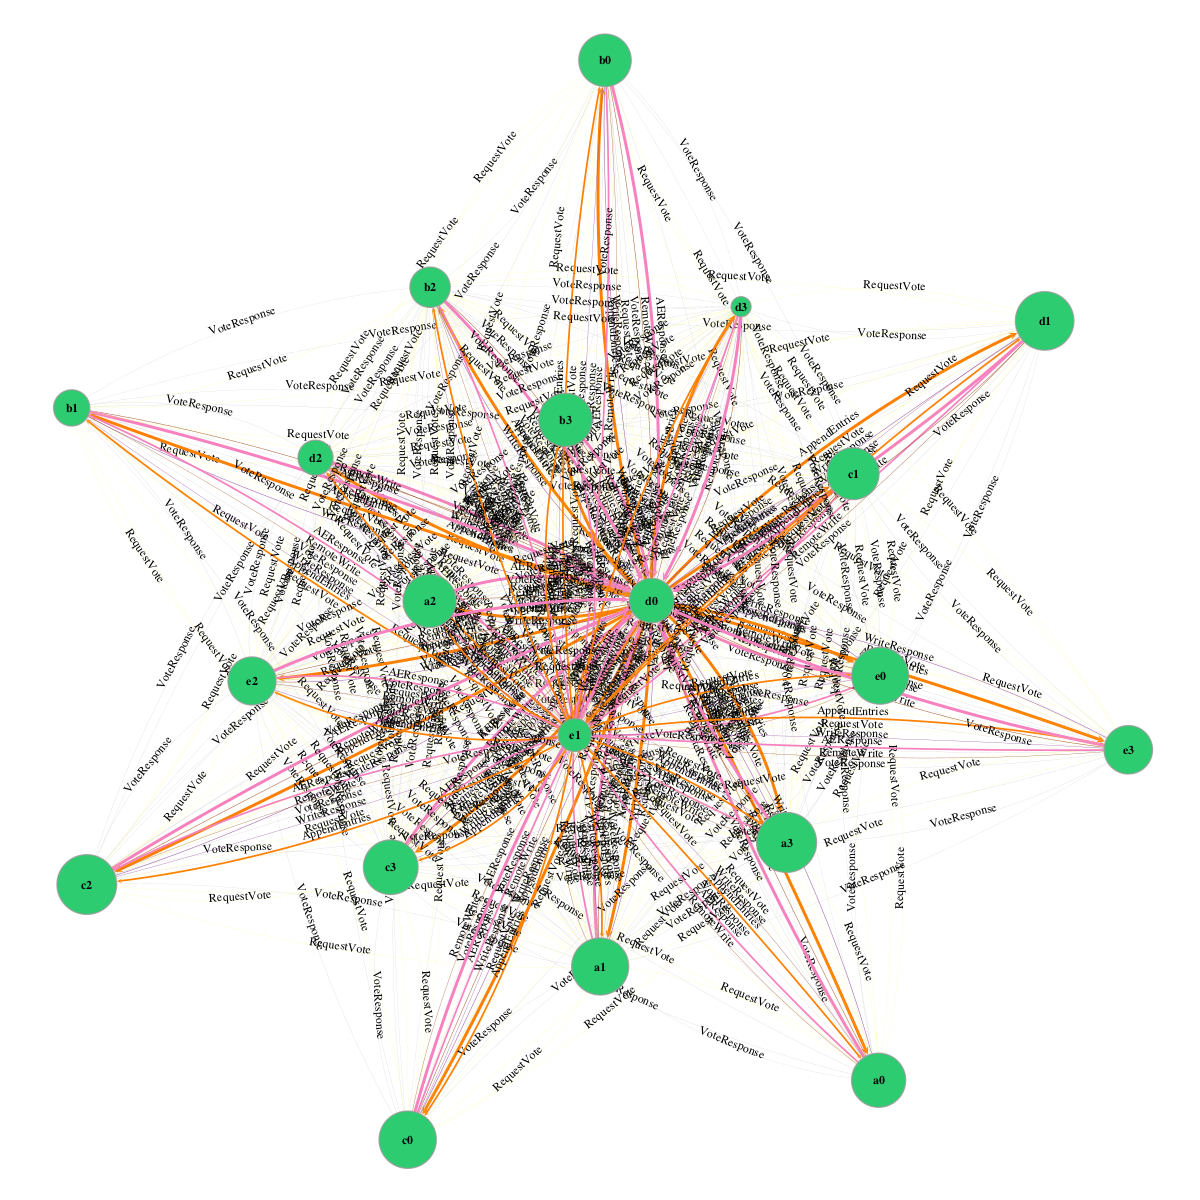

<PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x17e8628d0, at 0x17e87dfd0>

In [5]:
# Extract the Graph Tool graph     
G = extract_graph(results, by_message_type=True)

# Draw the graph 
vlabel  = G.vp['id']
vsize   = G.vp['writes']
vsize   = gt.prop_to_size(vsize, ma=60, mi=20)

# Set the vertex color 
vcolor  = G.new_vertex_property('string') 
vcmap   = ColorMap('flatui', shuffle=False)
for vertex in G.vertices():
    vcolor[vertex] = vcmap(G.vp['consistency'][vertex])

# Set the edge color 
ecolor  = G.new_edge_property('string')
ecmap   = ColorMap('set1', shuffle=False)
for edge in G.edges():
    ecolor[edge] = ecmap(G.ep['label'][edge])

elabel  = G.ep['label']
esize   = G.ep['norm']
esize   = gt.prop_to_size(esize, mi=.1, ma=3)
eweight = G.ep['weight']

# Figure out the path name to save the figure 
name = os.path.splitext(NAME)[0] + ".png"
output = os.path.join(FIGURES, name)

gt.graph_draw(
    G, output_size=(1200,1200), output=output,
    vertex_text=vlabel, vertex_size=vsize, vertex_font_weight=1, 
    vertex_pen_width=1.3, vertex_fill_color=vcolor,
    edge_pen_width=esize, edge_color=ecolor, edge_text=elabel
)

In [6]:
%%memit
# Create the data frame for further analysis
df = create_dataframe(results)

peak memory: 1864.13 MiB, increment: 20.78 MiB


In [7]:
df

,committed writes,completed reads,completed writes,consistency,dropped writes,empty reads,id,label,location,mean commit latency (ms),...,message types,reads,recv,replica,sent,type,visible writes,writes,partially replicated writes,visibility ratio
0,1097,1453,1097,strong,1.0,23,a0,Alpha 0,alpha-site,232.893710,...,"{u'RemoteWrite': 1097, u'VoteResponse': 24, u'...",1476,62972,a0,62972,desktop,1097,1098,1,0.999089
1,1109,1455,1109,strong,NaN,9,a1,Alpha 1,alpha-site,234.242367,...,"{u'RequestVote': 19, u'RemoteWrite': 1109, u'V...",1464,63002,a1,63002,laptop,1109,1109,0,1.000000
2,1094,1471,1094,strong,NaN,14,a2,Alpha 2,alpha-site,232.199125,...,"{u'RemoteWrite': 1094, u'RequestVote': 19, u'V...",1485,62991,a2,62991,laptop,1094,1094,0,1.000000
3,1121,1451,1121,strong,NaN,10,a3,Alpha 3,alpha-site,232.562276,...,"{u'RequestVote': 38, u'RemoteWrite': 1121, u'V...",1461,63032,a3,63032,laptop,1121,1121,0,1.000000
4,1092,1465,1092,strong,NaN,8,b0,Bravo 0,bravo-site,233.689914,...,"{u'RemoteWrite': 1092, u'VoteResponse': 24, u'...",1473,62967,b0,62967,desktop,1092,1092,0,1.000000
5,1050,1501,1050,strong,NaN,23,b1,Bravo 1,bravo-site,231.429319,...,"{u'RemoteWrite': 1050, u'VoteResponse': 24, u'...",1524,62925,b1,62925,laptop,1050,1050,0,1.000000
6,1057,1491,1057,strong,1.0,14,b2,Bravo 2,bravo-site,233.556085,...,"{u'RemoteWrite': 1057, u'RequestVote': 19, u'V...",1505,62950,b2,62950,laptop,1057,1058,1,0.999055
7,1094,1471,1094,strong,1.0,14,b3,Bravo 3,bravo-site,233.622098,...,"{u'RequestVote': 19, u'RemoteWrite': 1094, u'V...",1485,62987,b3,62987,laptop,1094,1095,1,0.999087
8,1109,1459,1109,strong,1.0,10,c0,Charlie 0,charlie-site,232.457172,...,"{u'RemoteWrite': 1109, u'VoteResponse': 24, u'...",1469,62984,c0,62984,desktop,1109,1110,1,0.999099
9,1090,1466,1090,strong,NaN,20,c1,Charlie 1,charlie-site,233.505357,...,"{u'RemoteWrite': 1090, u'RequestVote': 38, u'V...",1486,63001,c1,63001,laptop,1090,1090,0,1.000000


# Results 

In [8]:
print results.print_details()

Simulation: Large Raft Consensus Group (Cloudscope v0.4)
A large group of sequentially consistent nodes enforced by Raft in 5 locations.

Ran on: Aug 16, 2016 at 11:45 UTC (7 minutes 37 seconds)

Settings
Read Policy                latest
Constant                   N/A ms
Hearbeat Interval             300
Online Stddev                 512
Access Mean                  1800
Outage Prob                   0.0
Seed                           42
Access Stddev                 240
Do Rumoring                     0
Partition Across             wide
Switch Prob                  0.05
Conflict Prob                 0.0
Move Prob                     0.1
Latency Stddev                 15
Integration             federated
Outage Stddev                 512
Latency Mean                   60
Invalid Locations    [u'unknown']
Default Latency               800
Do Gossip                       1
Tick Metric                   600
Max Sim Time              4640000
Random Seed                    42
Description  

## Topology

## Workload

<module 'matplotlib.pyplot' from '/usr/local/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

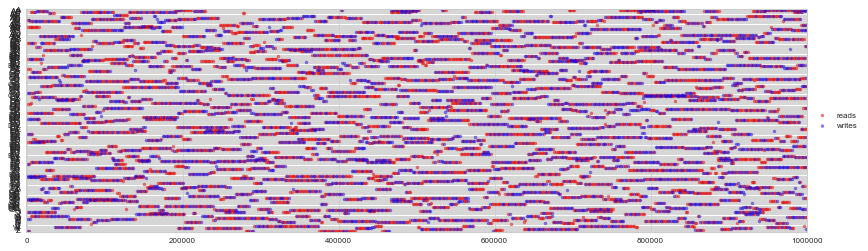

In [9]:
# Create the workload timeline plot 
plot_workload(results, series='objects')

In [ ]:
# Create the sent messages timeline
# plot_message_traffic(results.results['sent'])

peak memory: 1870.49 MiB, increment: 0.03 MiB


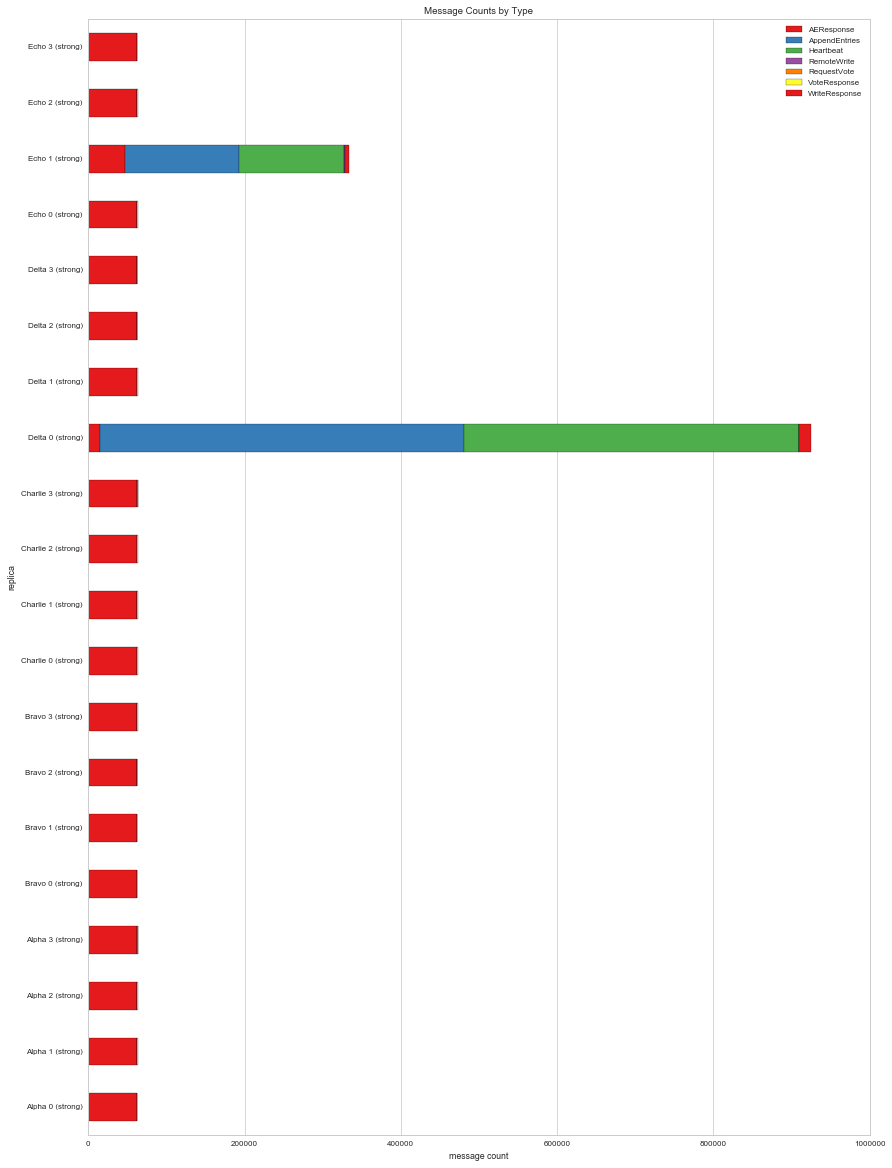

In [15]:
%%memit

def get_message_rows(df):
    for row in df[['message types', 'label', 'consistency']].itertuples(): 
        item = row[1]
        item['replica'] = "{} ({})".format(row[2], row[3])
        yield item

# Create the data frame 
msgs = pd.DataFrame(sorted(get_message_rows(df), key=lambda item: item['replica']))

# Create the figure 
fig = plt.figure(figsize=(14,20))
ax  = fig.add_subplot(111)
mpl.rcParams.update({'font.size': 14})

# Plot the bar chart 
g = msgs.plot(
    x='replica', kind='barh', stacked=True, ax=ax, 
    title="Message Counts by Type", color=sns.color_palette()
)

# Modify the figure 
ax.set_xlabel("message count")
ax.yaxis.grid(False)

# Save the figure to disk 
plt.savefig(os.path.join(FIGURES, 'message_counts.png'))

In [ ]:
# ax = sns.barplot(y='sent', x='replica', hue='type', data=msgs, estimator=count)

## Metrics 

The following metrics are reported from the results.

### Reads and Writes

Accesses
29788 Total Reads, 21714 Total Writes 
1489.4 average reads per replica
1085.7 average writes per replica



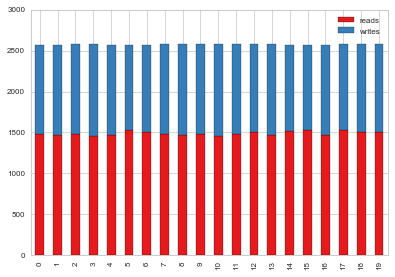

In [16]:
# Extract accesses 
accesses = pd.DataFrame(df, columns=['reads', 'writes'])

print (
    "Accesses\n"
    "========\n"
    "{} Total Reads, {} Total Writes \n"
    "{:0.1f} average reads per replica\n"
    "{:0.1f} average writes per replica\n"
).format(
    df.reads.sum(), df.writes.sum(), df.reads.mean(), df.writes.mean()
)

accesses.plot(kind='bar', stacked=True)

### Stale Reads

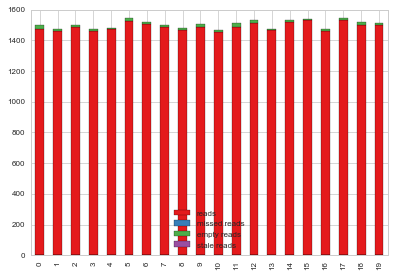

In [17]:
errors = pd.DataFrame(df, columns=['reads', 'missed reads', 'empty reads', 'stale reads'])
errors.plot(kind='bar', stacked=True)

### Forked Writes

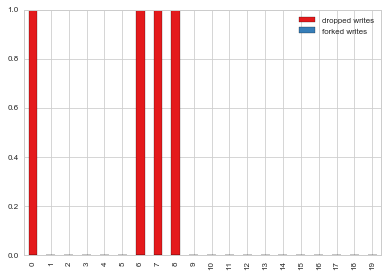

In [19]:
errors = pd.DataFrame(df, columns=['dropped writes', 'forked writes'])
errors.plot(kind='bar', stacked=True)

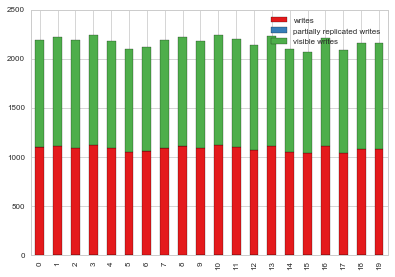

In [20]:
errors = pd.DataFrame(df, columns=['writes', 'partially replicated writes', 'visible writes'])
errors.plot(kind='bar', stacked=True)

### Read and Write Costs

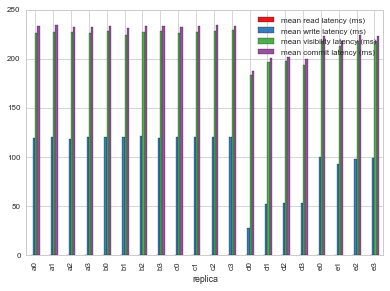

In [21]:
data=pd.DataFrame(df, columns=['replica', 'mean read latency (ms)', 'mean write latency (ms)', 'mean visibility latency (ms)', 'mean commit latency (ms)'])
data.plot(kind='bar', x='replica')